<a href="https://colab.research.google.com/github/minat-hub/She-Code-Africa-Mentorship-Tasks/blob/main/laptopprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
 
 
%matplotlib inline
 
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path =  '/content/drive/MyDrive/laptop_price.csv'
df = pd.read_csv(path, encoding = "ISO-8859-1")
df
# Dataset is now stored in a Pandas Dataframe

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


# Our columns
1 Company- String -Laptop Manufacturer

2 Product -String -Brand and Model

3 TypeName -String -Type (Notebook, Ultrabook, Gaming, etc.)

4 Inches -Numeric- Screen Size

5 ScreenResolution -String- Screen Resolution

6 Cpu- String -Central Processing Unit (CPU)

7 Ram -String- Laptop RAM

8 Memory -String- Hard Disk / SSD Memory

9 GPU -String- Graphics Processing Units (GPU)

10 OpSys -String- Operating System

11 Weight -String- Laptop Weight

12 Price_euros -Numeric- Price (Euro)

In [ ]:
#shape of the dataset
df.shape

(1303, 13)

In [ ]:
df.head(20)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00
6,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,1158.70
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00
9,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,770.00


In [ ]:
#check for dataset empty values
noll = df.isnull()
nol = noll.any(axis=1)
nos = df[nol]
print(nos['Cpu'])

In [ ]:
#check for duplicate rows
duplicates = df[df.duplicated()]
duplicates

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros


There are no duplicate values in our dataset

In [ ]:
#cleaning our dataset
df["Ram"] = df["Ram"].str.replace('GB', '')
df["Weight"] = df["Weight"].str.replace('kg', '')
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new2 = df["Memory"].str.split("+", n = 1, expand = True)
df["first"]= new2[0]
df["first"]=df["first"].str.strip()
df["second"]= new2[1]
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)
df['first'] = df['first'].str.replace(r'\D', '')
df["second"].fillna("0", inplace = True)
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)
df['second'] = df['second'].str.replace(r'\D', '')
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)
df["Total_Memory"]=(df["first"]*(df["Layer1HDD"]+df["Layer1SSD"]+df["Layer1Hybrid"]+df["Layer1Flash_Storage"])+df["second"]*(df["Layer2HDD"]+df["Layer2SSD"]+df["Layer2Hybrid"]+df["Layer2Flash_Storage"]))
df["Memory"]=df["Total_Memory"]
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])
new = df["ScreenResolution"].str.split("x", n = 1, expand = True) 
df["X_res"]= new[0]
df["Y_res"]= new[1]
df["Y_res"]= pd.to_numeric(df["Y_res"])
df["Y_res"]= df["Y_res"].astype(float)
df["X_res"]=(df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x: pd.Series(x).astype(int)).mean(1))
df["X_res"]=pd.to_numeric(df["X_res"])
df["PPI"]=(((df["X_res"]**2+df["Y_res"]**2)**(1/2))/df["Inches"]).astype(float)
df["ScreenResolution"]=(df["X_res"]*df["Y_res"]).astype(float)
df["Ram"] = df["Ram"].astype(int)
df["Weight"] = df["Weight"].astype(float)
df=df.drop(['first','second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash_Storage','Layer2HDD','Layer2SSD','Layer2Hybrid','Layer2Flash_Storage','Total_Memory'],axis=1)

In [ ]:
df["Cpu"]  = df["Cpu"].str.extract('(\d\.\d)')
#dt=  df['Cpu'].str.extract('(\d\.\d)GHz')
#dt2 = df["Cpu"].str.extract('(\d)GHz').astype(float)
#dt.astype(float)
df["Cpu"]  = df["Cpu"].astype(float)
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,HDD,SSD,Hybrid,Flash_Storage,X_res,Y_res,PPI
0,1,Apple,MacBook Pro,Ultrabook,13.3,4096000.0,2.3,8,128,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,128,0,0,2560.0,1600.0,226.983005
1,2,Apple,Macbook Air,Ultrabook,13.3,1296000.0,1.8,8,128,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,0,128,1440.0,900.0,127.677940
2,3,HP,250 G6,Notebook,15.6,2073600.0,2.5,8,256,Intel HD Graphics 620,No OS,1.86,575.00,0,256,0,0,1920.0,1080.0,141.211998
3,4,Apple,MacBook Pro,Ultrabook,15.4,5184000.0,2.7,16,512,AMD Radeon Pro 455,macOS,1.83,2537.45,0,512,0,0,2880.0,1800.0,220.534624
4,5,Apple,MacBook Pro,Ultrabook,13.3,4096000.0,3.1,8,256,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,256,0,0,2560.0,1600.0,226.983005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,2073600.0,2.5,4,128,Intel HD Graphics 520,Windows 10,1.80,638.00,0,128,0,0,1920.0,1080.0,157.350512
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,5760000.0,2.5,16,512,Intel HD Graphics 520,Windows 10,1.30,1499.00,0,512,0,0,3200.0,1800.0,276.053530
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1049088.0,1.6,2,64,Intel HD Graphics,Windows 10,1.50,229.00,0,0,0,64,1366.0,768.0,111.935204
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1049088.0,2.5,6,1000,AMD Radeon R5 M330,Windows 10,2.19,764.00,1000,0,0,0,1366.0,768.0,100.454670


In [ ]:
#statistics of the dataset
df.describe()

,laptop_ID,Inches,ScreenResolution,Cpu,Ram,Memory,Weight,Price_euros,HDD,SSD,Hybrid,Flash_Storage,X_res,Y_res,PPI
count,1303.000000,1303.000000,1.303000e+03,1217.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,2.168807e+06,2.303862,8.382195,610.904068,2.038734,1123.686992,413.783576,183.732924,8.831926,4.555641,1894.784344,1070.830391,146.635987
std,381.172104,1.426304,1.391292e+06,0.512437,5.084665,467.509021,0.665475,699.009043,515.818779,186.966903,92.567185,30.274090,494.641028,284.519410,43.121345
min,1.000000,10.100000,1.049088e+06,0.900000,2.000000,8.000000,0.690000,174.000000,0.000000,0.000000,0.000000,0.000000,1366.000000,768.000000,90.583402
25%,331.500000,14.000000,1.440000e+06,1.800000,4.000000,256.000000,1.500000,599.000000,0.000000,0.000000,0.000000,0.000000,1600.000000,900.000000,127.335675
50%,659.000000,15.600000,2.073600e+06,2.500000,8.000000,500.000000,2.040000,977.000000,0.000000,256.000000,0.000000,0.000000,1920.000000,1080.000000,141.211998
75%,990.500000,15.600000,2.073600e+06,2.700000,8.000000,1000.000000,2.300000,1487.880000,1000.000000,256.000000,0.000000,0.000000,1920.000000,1080.000000,157.350512
max,1320.000000,18.400000,8.294400e+06,3.600000,64.000000,2512.000000,4.700000,6099.000000,2000.000000,1024.000000,1000.000000,512.000000,3840.000000,2160.000000,352.465147


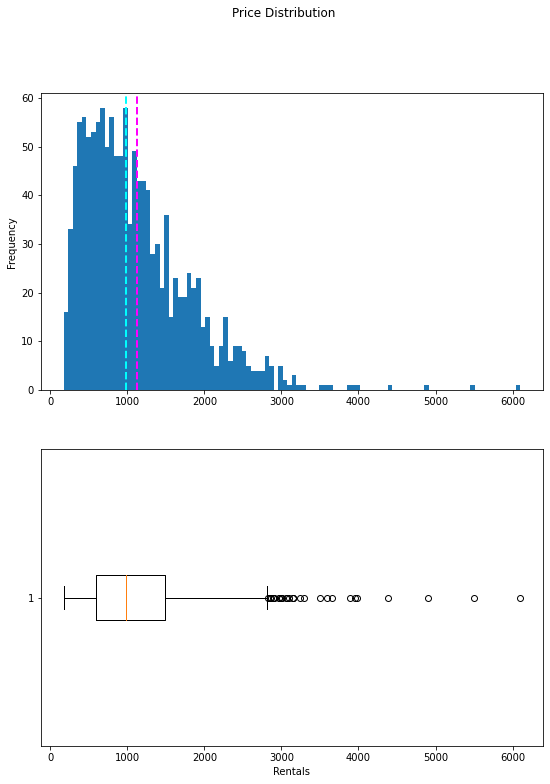

In [ ]:
# Get the label column
labl = df['Price_euros']


# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(labl, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(labl.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(labl.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(labl, vert=False)
ax[1].set_xlabel('Rentals')

# Add a title to the Figure
fig.suptitle('Price Distribution')

# Show the figure
fig.show()


The plots show that the prices of laptops ranges from  around 100 to just over 6000. However, the mean (and median) prices is closer to the low end of that range, with most of the data between 100 and around 3000 rentals. The few values above this are shown in the box plot as small circles, indicating that they are outliers - in other words, unusually high or low values beyond the typical range of most of the data.

visualizing our columns 

In [ ]:
pri = df.groupby('Price_euros').max()
pri

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,HDD,SSD,Hybrid,Flash_Storage,X_res,Y_res,PPI
Price_euros,,,,,,,,,,,,,,,,,,,
174.0,1233,Acer,C740-C9QX (3205U/2GB/32GB/Chrome,Netbook,11.6,1049088.0,1.5,2,32,Intel HD Graphics,Chrome OS,1.30,0,32,0,0,1366.0,768.0,135.094211
191.9,21,Asus,Vivobook E200HA,Netbook,11.6,1049088.0,1.4,2,32,Intel HD Graphics 400,Windows 10,0.98,0,0,0,32,1366.0,768.0,135.094211
196.0,1135,Vero,V131 (X5-Z8350/4GB/32GB/FHD/W10),Notebook,13.3,2073600.0,1.4,4,32,Intel HD Graphics 400,Windows 10,1.35,0,0,0,32,1920.0,1080.0,165.632118
199.0,295,Asus,E402WA-GA010T (E2-6110/2GB/32GB/W10),Notebook,15.6,1049088.0,1.5,2,32,Intel HD Graphics,Windows 10,2.19,0,16,0,32,1366.0,768.0,111.935204
202.9,800,Vero,K146 (N3350/4GB/32GB/W10),Notebook,14.0,2073600.0,1.1,4,32,Intel HD Graphics 500,Windows 10,1.22,0,0,0,32,1920.0,1080.0,157.350512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3975.0,1081,Asus,ROG G701VO,Gaming,17.3,2073600.0,2.7,64,1000,Nvidia GeForce GTX 980,Windows 10,3.58,0,1000,0,0,1920.0,1080.0,127.335675
4389.0,758,HP,Zbook 17,Workstation,17.3,2073600.0,2.9,16,256,Nvidia Quadro M2000M,Windows 7,3.00,0,256,0,0,1920.0,1080.0,127.335675
4899.0,617,Lenovo,Thinkpad P51,Notebook,15.6,8294400.0,3.1,32,1000,Nvidia Quadro M2200M,Windows 10,2.50,0,1000,0,0,3840.0,2160.0,282.423996


The most expensive laptop is produced by Razer and it is used for gaming. I think the things that influence laptop price the most are typename, inches, ScreenResolution,	Cpu,	Ram,	Memory,	Gpu. By the end of this notebook we will be sure.

In [ ]:
c = pri.loc[(pri['TypeName']=='Gaming') & (pri['Inches'] == 17.3)]
c

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,HDD,SSD,Hybrid,Flash_Storage,X_res,Y_res,PPI
Price_euros,,,,,,,,,,,,,,,,,,,
1039.00,396,Asus,Rog GL753VD-GC042T,Gaming,17.3,2073600.0,2.8,8,1000,Nvidia GeForce GTX 1050,Windows 10,3.00,1000,0,0,0,1920.0,1080.0,127.335675
1168.00,622,Asus,FX753VD-GC007T (i7-7700HQ/8GB/1TB,Gaming,17.3,2073600.0,2.8,8,1128,Nvidia GeForce GTX 1050,Windows 10,3.00,1000,128,0,0,1920.0,1080.0,127.335675
1187.00,296,Asus,FX753VD-GC071T (i7-7700HQ/8GB/1TB/GeForce,Gaming,17.3,2073600.0,2.8,8,1000,Nvidia GeForce GTX 1050,Windows 10,3.00,1000,0,0,0,1920.0,1080.0,127.335675
1191.80,1046,MSI,GL72M 7RDX,Gaming,17.3,2073600.0,2.8,8,1128,Nvidia GeForce GTX 1050 Ti,Windows 10,2.70,1000,128,0,0,1920.0,1080.0,141.211998
1312.49,1134,Asus,Rog GL752VW-T4308T,Gaming,17.3,2073600.0,2.6,8,1128,Nvidia GeForce GTX 960M,Windows 10,3.52,1000,128,0,0,1920.0,1080.0,127.335675
1348.48,732,MSI,GL72M 7REX,Gaming,17.3,2073600.0,2.8,8,1128,Nvidia GeForce GTX 1050 Ti,Windows 10,2.70,1000,128,0,0,1920.0,1080.0,127.335675
1369.90,898,Asus,Rog GL753VD-GC082T,Gaming,17.3,2073600.0,2.5,12,1128,Nvidia GeForce GTX 1050,Windows 10,2.20,1000,128,0,0,1920.0,1080.0,127.335675
1407.00,216,Asus,ROG GL703VD-GC028T,Gaming,17.3,2073600.0,2.8,16,1256,Nvidia GeForce GTX 1050,Windows 10,2.90,1000,256,0,0,1920.0,1080.0,127.335675
1409.00,358,MSI,GP72MVR 7RFX,Gaming,17.3,2073600.0,2.8,8,1128,Nvidia GeForce GTX 1060,Windows 10,2.70,1000,128,0,0,1920.0,1080.0,127.335675


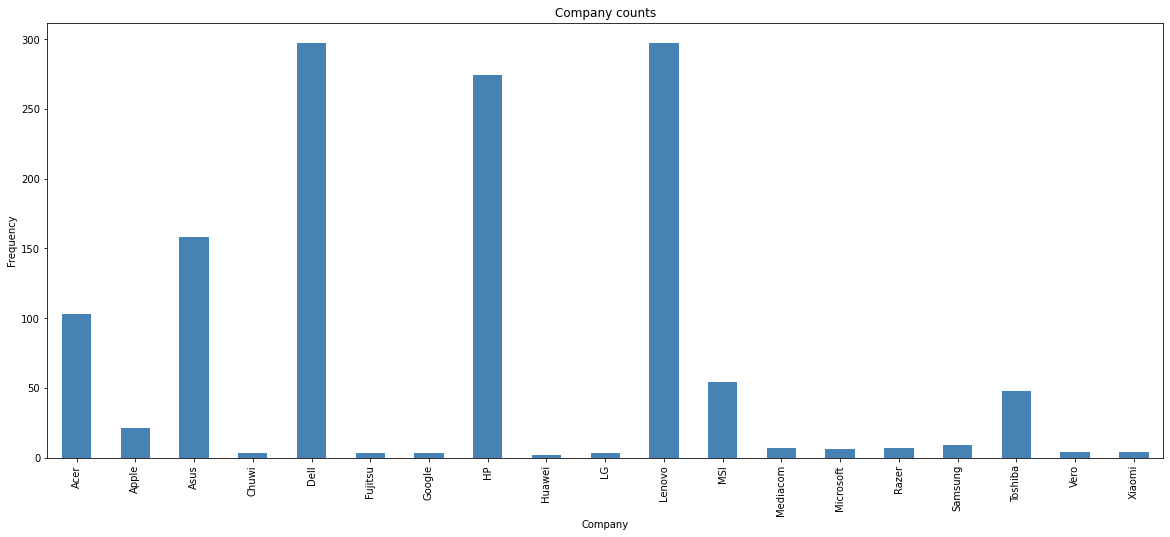

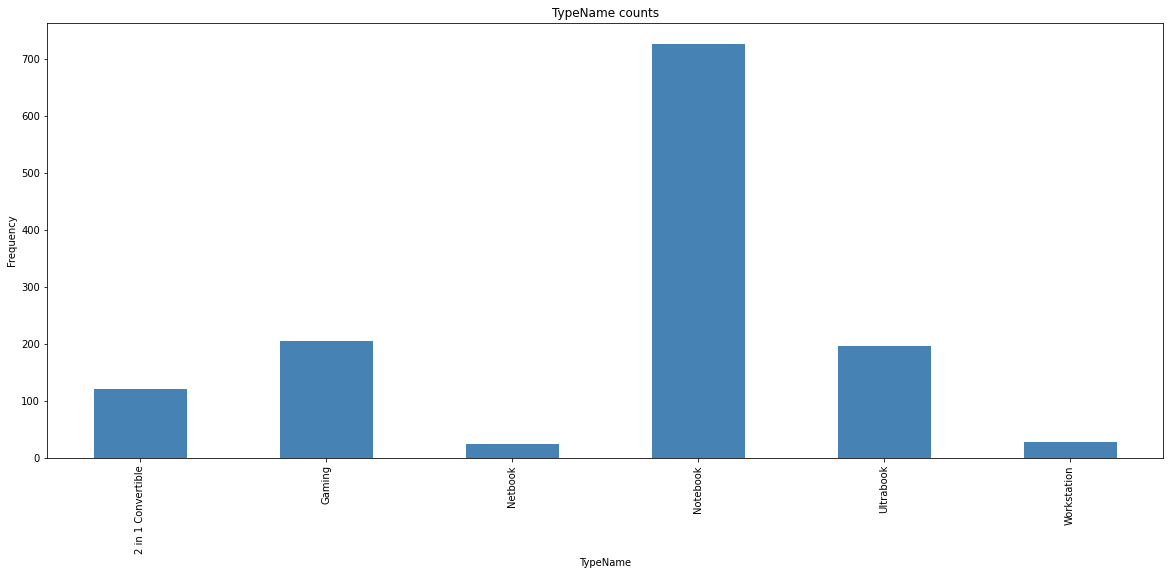

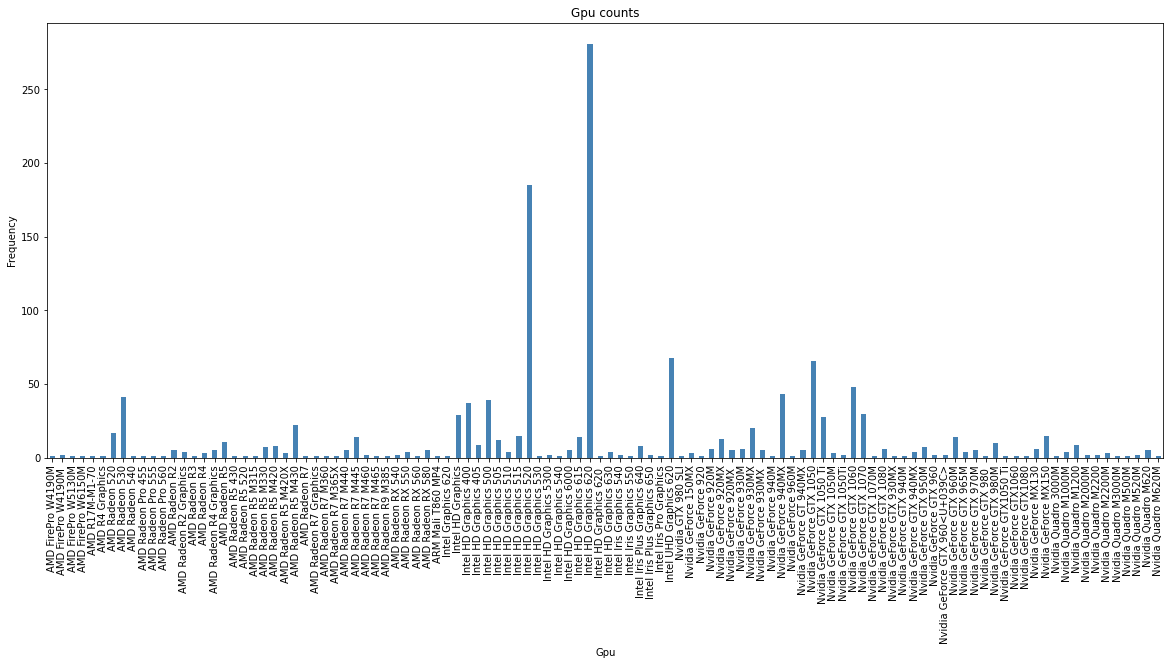

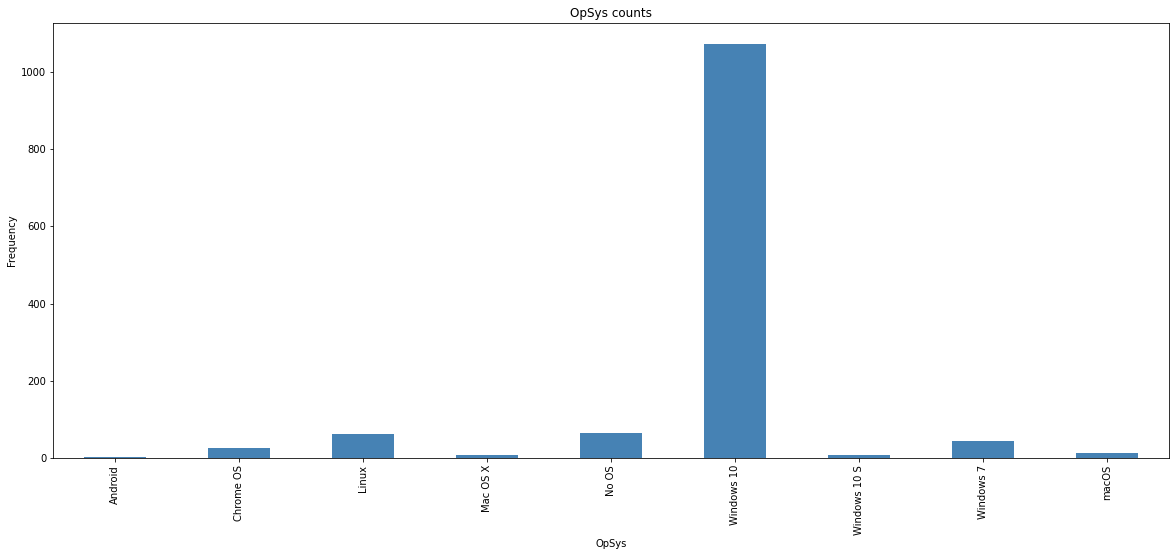

In [ ]:

# plot a bar plot for each categorical feature count
categorical_features = ['Company','TypeName','Gpu','OpSys']

for col in categorical_features:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(20, 8))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

Many of the categorical features do not show a more or less uniform distribution (meaning there's different number of rows for each category). 

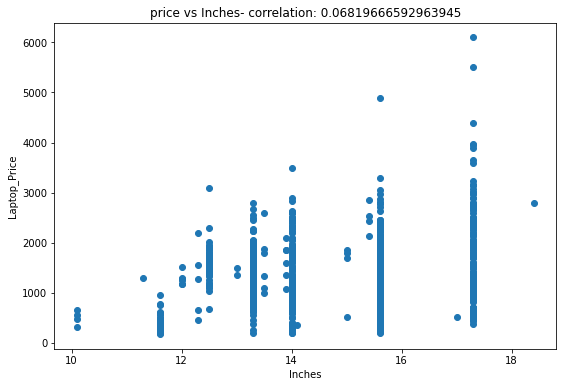

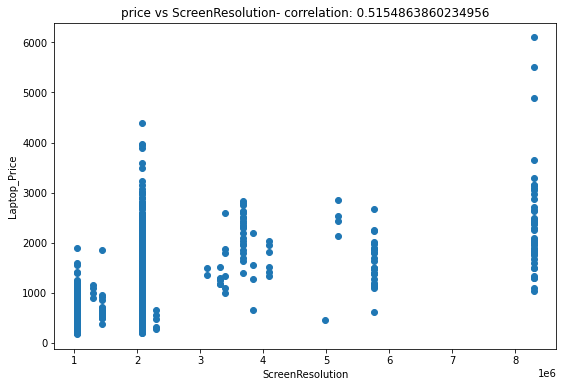

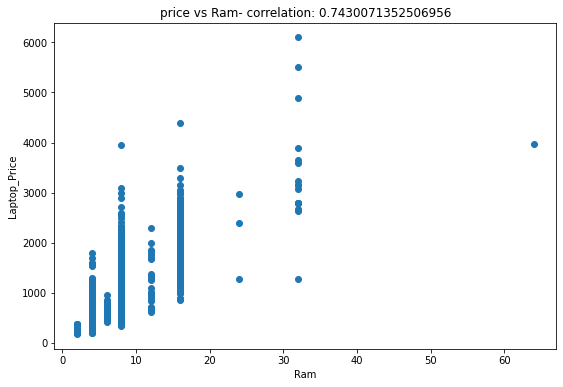

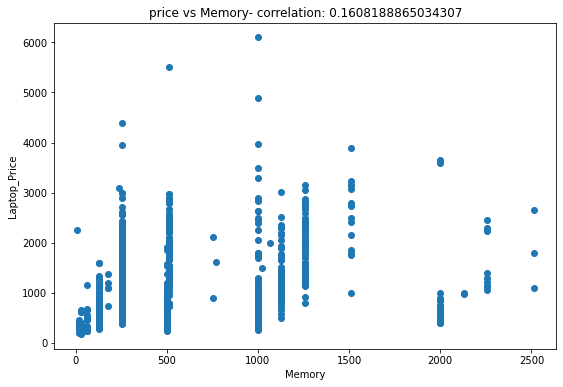

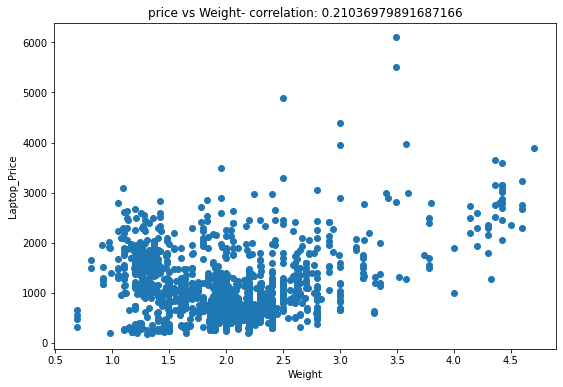

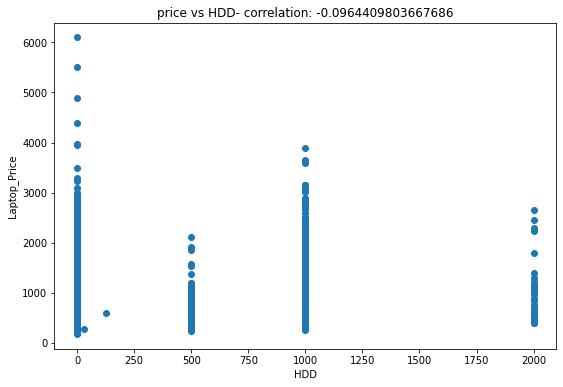

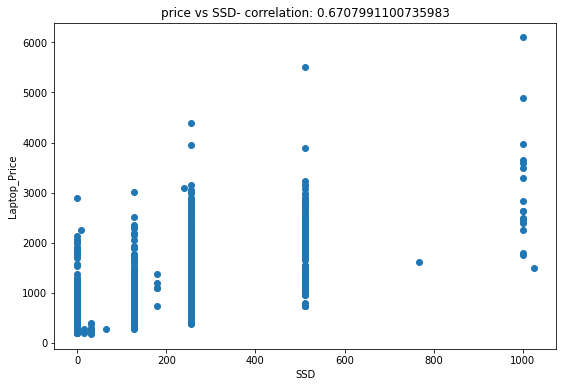

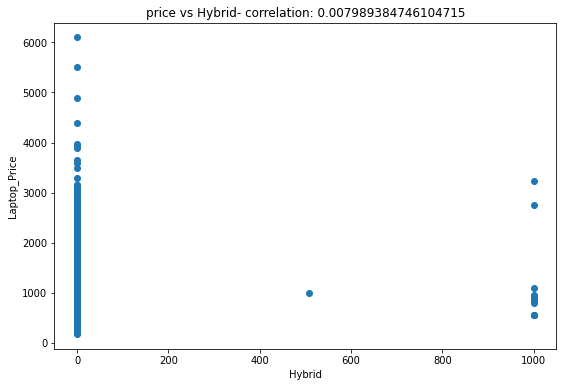

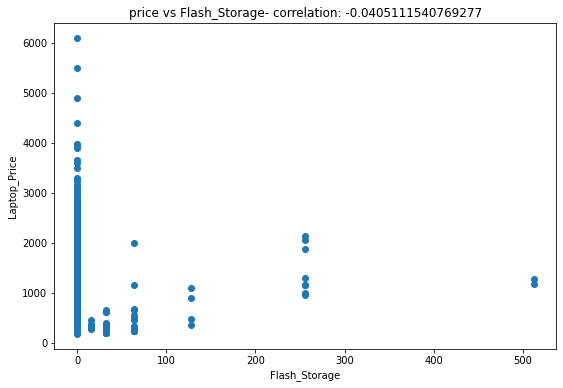

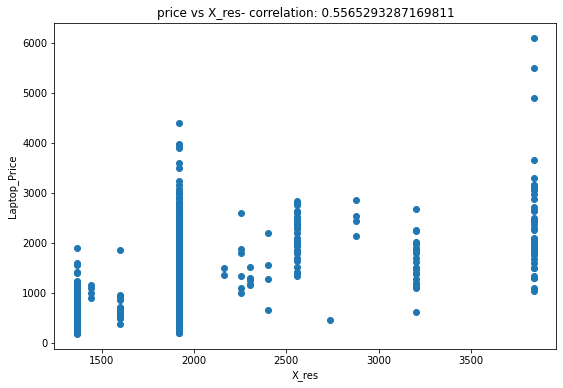

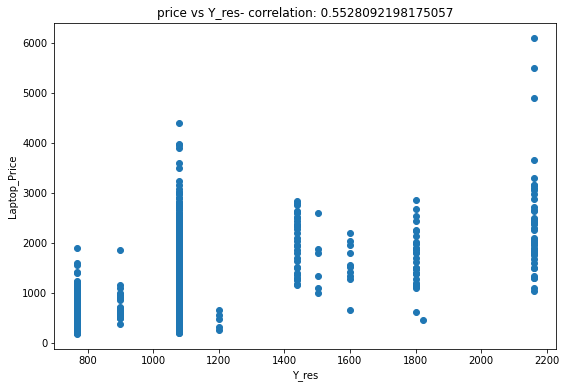

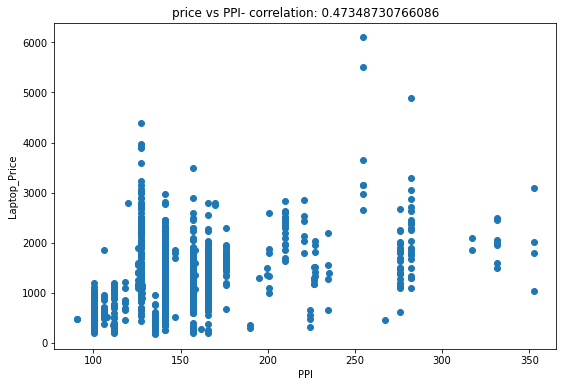

In [ ]:
numeric_features = ['Inches','ScreenResolution','Ram','Memory','Weight', 'HDD', 'SSD', 'Hybrid', 'Flash_Storage', 'X_res', 'Y_res', 'PPI']
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Price_euros']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Laptop_Price')
    ax.set_title('price vs ' + col + '- correlation: ' + str(correlation))
plt.show()

The results aren't conclusive, but if you look closely at the scatter plots for ram, you can see a direct trend showing that higher price tend to coincide with higher ram; and a correlation value of over 0.7 for both of these features supports this observation. Conversely, the plots for hdd and flash show a slightly negative correlation, indicating that there are lower prices on laptops with high flash storage or hdd.
 SSDs are more expensive because they're a newer, more modern technology. Rather than writing to a magnetic disc like an HDD, they store directly on chips, and thus are much faster, require less energy, and operate noiselessly. The trade off is the expense, which is steadily decreasing. HDDs are cheap because they have been around for longer and the refinement of the manufacturing process over time has allowed for increased efficiency/cost cutting.

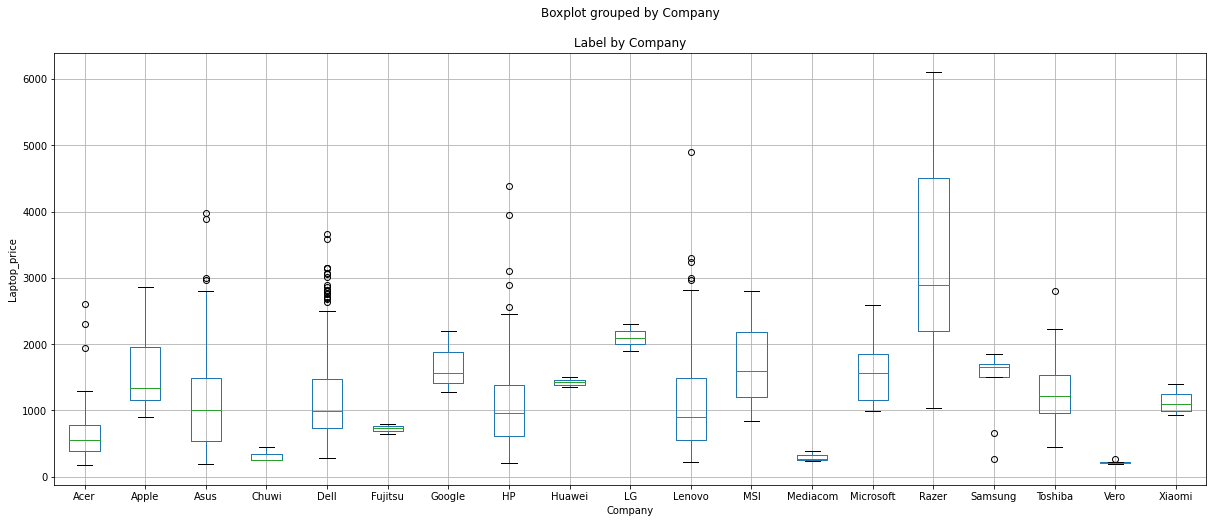

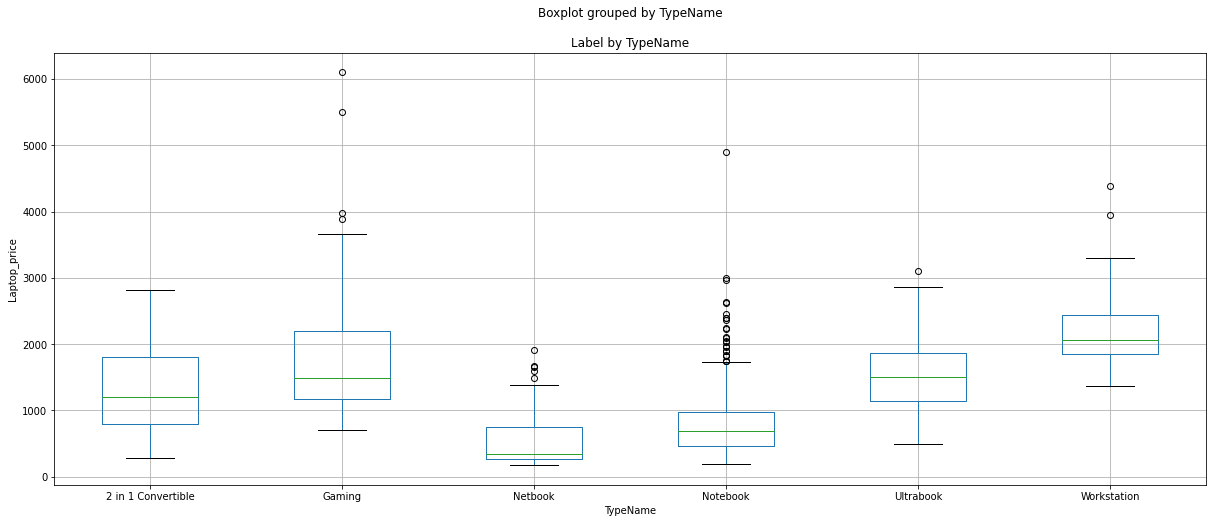

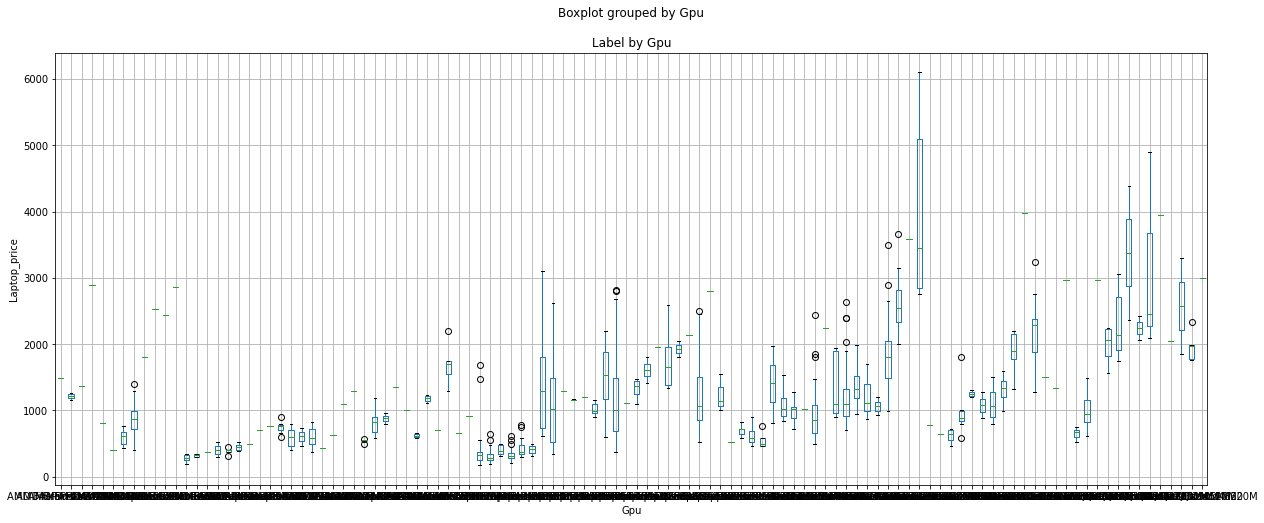

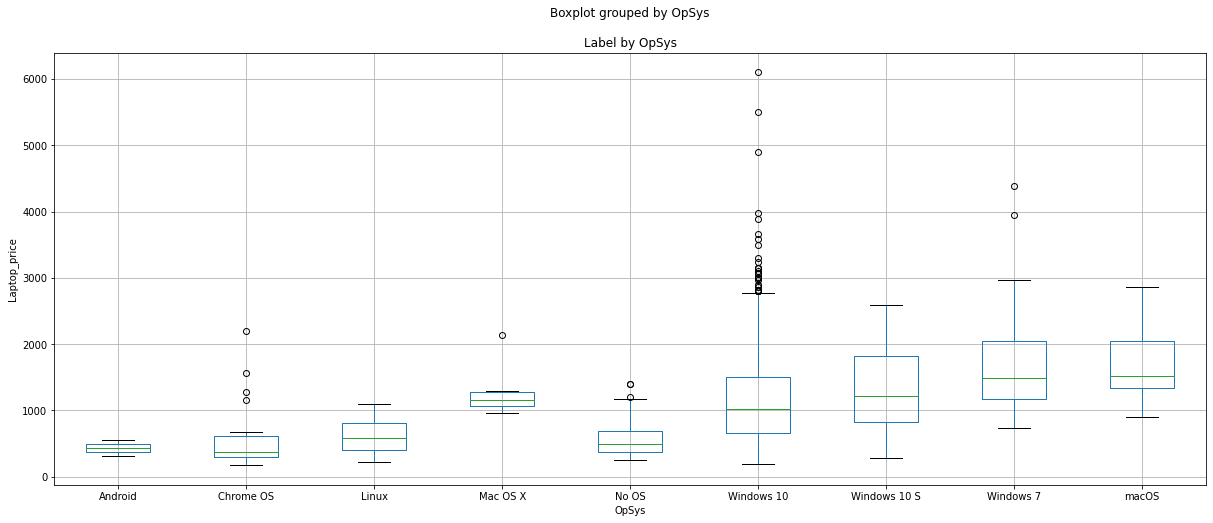

In [ ]:
# plot a boxplot for the label by each categorical feature
for col in categorical_features:
    fig = plt.figure(figsize=(20, 8))
    ax = fig.gca()
    df.boxplot(column = 'Price_euros', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Laptop_price")
plt.show()

The plots show some variance in the relationship between some category values and prices. For example, there's a clear difference in the distribution of prices vs cpu and gpu There's a noticeable trend that shows different price distributions in cpu and gpu.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

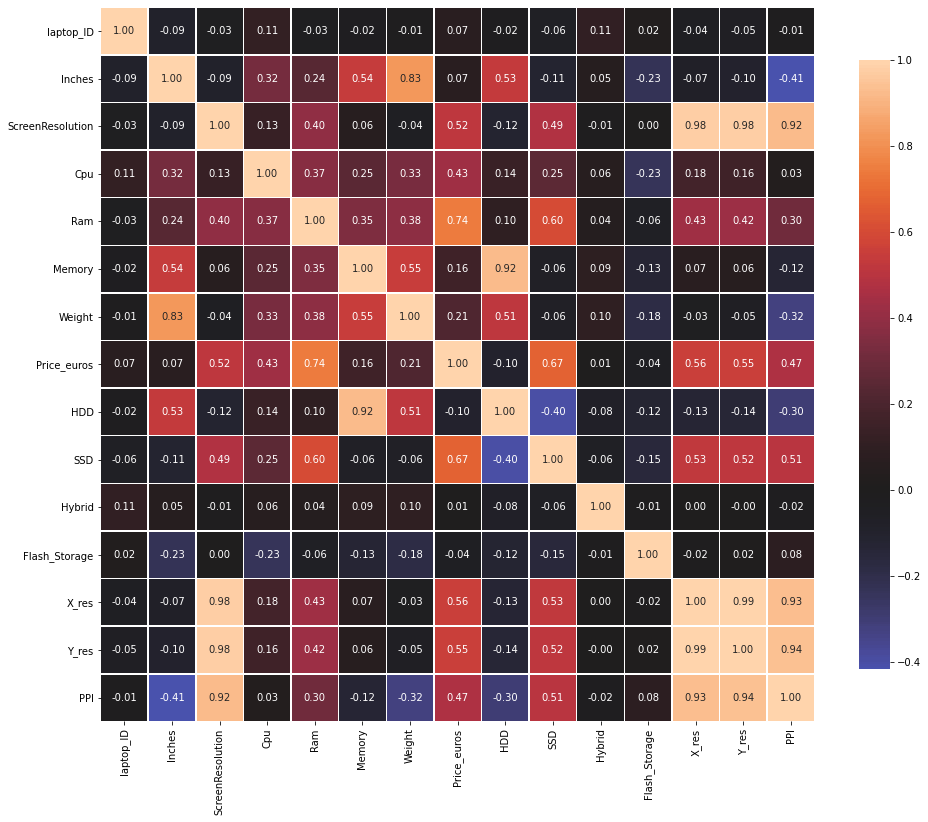

In [ ]:
def correlation_heatmap(train):
    correlations = train.corr()
    fig,ax = plt.subplots(figsize = (16,16))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt= '.2f', square=True, linewidth=.5, annot= True, cbar_kws={'shrink':.70})
    plt.show()
correlation_heatmap(df)

Now that we've explored the data, it's time to use it to train a regression model that uses the features we've identified as potentially predictive to predict the price label. The first thing we need to do is to separate the features we want to use to train the model from the label we want it to predict.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   float64
 6   Cpu               1217 non-null   float64
 7   Ram               1303 non-null   int64  
 8   Memory            1303 non-null   int64  
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   float64
 12  Price_euros       1303 non-null   float64
 13  HDD               1303 non-null   int64  
 14  SSD               1303 non-null   int64  
 15  Hybrid            1303 non-null   int64  
 16  Flash_Storage     1303 non-null   int64  


In [ ]:
# Separate features and labels
X, y = df[['Ram', 'SSD']].values, df['Price_euros'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[  8 128]
 [  8   0]
 [  8 256]
 [ 16 512]
 [  8 256]
 [  4   0]
 [ 16   0]
 [  8   0]
 [ 16 512]
 [  8 256]]

Labels:
[1339.69  898.94  575.   2537.45 1803.6   400.   2139.97 1158.7  1495.
  770.  ]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 1042 rows
Test Set: 261 rows


In [ ]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 183355.9386915997
RMSE: 428.20081584649006
R2: 0.639010900689587


Try Another Linear Algorithm

Let's try training our regression model by using a Lasso algorithm. We can do this by just changing the estimator in the training code.

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) 

MSE: 183363.11991938937
RMSE: 428.2092011148165
R2: 0.6389967623694963


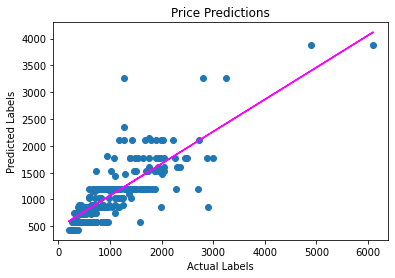

In [ ]:
from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
model2 = Lasso().fit(X_train, y_train)
print (model2, "\n")

# Evaluate the model using the test data
predictions2 = model2.predict(X_test)
mse2 = mean_squared_error(y_test, predictions2)
print("MSE:", mse2)
rmse2 = np.sqrt(mse2)
print("RMSE:", rmse2)
r2_2 = r2_score(y_test, predictions2)
print("R2:", r2_2)

# Plot predicted vs actual
plt.scatter(y_test, predictions2)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Price Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions2, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### Try a Decision Tree Algorithm

As an alternative to a linear model, there's a category of algorithms for machine learning that uses a tree-based approach in which the features in the dataset are examined in a series of evaluations, each of which results in a *branch* in a *decision tree* based on the feature value. At the end of each series of branches are leaf-nodes with the predicted label value based on the feature values.

It's easiest to see how this works with an example. Let's train a Decision Tree regression model using the laptop price. After training the model, the code below will print the model definition and a text representation of the tree it uses to predict label values.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model3 = DecisionTreeRegressor().fit(X_train, y_train)
print (model3, "\n")

# Visualize the model tree
tree = export_text(model3)
print(tree)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') 

|--- feature_0 <= 14.00
|   |--- feature_0 <= 7.00
|   |   |--- feature_1 <= 96.00
|   |   |   |--- feature_0 <= 3.00
|   |   |   |   |--- feature_1 <= 8.00
|   |   |   |   |   |--- value: [248.76]
|   |   |   |   |--- feature_1 >  8.00
|   |   |   |   |   |--- feature_1 <= 24.00
|   |   |   |   |   |   |--- value: [199.00]
|   |   |   |   |   |--- feature_1 >  24.00
|   |   |   |   |   |   |--- value: [174.00]
|   |   |   |--- feature_0 >  3.00
|   |   |   |   |--- feature_1 <= 8.00
|   |   |   |   |   |--- feature_0 <= 5.00
|   |   |   |   |   |   |--- value: [513.54]
|   |   |   |   |   

MSE: 183355.9386915997
RMSE: 428.20081584649006
R2: 0.639010900689587


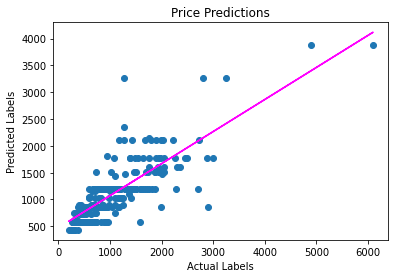

In [ ]:
# Evaluate the model using the test data
predictions3 = model.predict(X_test)
mse3 = mean_squared_error(y_test, predictions3)
print("MSE:", mse3)
rmse3 = np.sqrt(mse3)
print("RMSE:", rmse3)
r2_3 = r2_score(y_test, predictions3)
print("R2:", r2_3)

# Plot predicted vs actual
plt.scatter(y_test, predictions3)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Price Predictions')
# overlay the regression line
z3 = np.polyfit(y_test, predictions3, 1)
p3 = np.poly1d(z3)
plt.plot(y_test,p3(y_test), color='magenta')
plt.show()

The tree-based model doesn't seem to have improved over the linear model, so what else could we try?

Try an Ensemble Algorithm

Ensemble algorithms work by combining multiple base estimators to produce an optimal model, either by applying an aggregate function to a collection of base models (sometimes referred to a bagging) or by building a sequence of models that build on one another to improve predictive performance (referred to as boosting).

For example, let's try a Random Forest model, which applies an averaging function to multiple Decision Tree models for a better overall model.

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) 

MSE: 192737.85744973362
RMSE: 439.0191994090163
R2: 0.6205398850984383


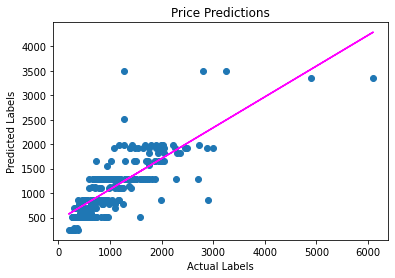

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model4 = RandomForestRegressor().fit(X_train, y_train)
print (model4, "\n")

# Evaluate the model using the test data
predictions4 = model4.predict(X_test)
mse4 = mean_squared_error(y_test, predictions4)
print("MSE:", mse4)
rmse4 = np.sqrt(mse4)
print("RMSE:", rmse4)
r2_4 = r2_score(y_test, predictions4)
print("R2:", r2_4)

# Plot predicted vs actual
plt.scatter(y_test, predictions4)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Price Predictions')
# overlay the regression line
z4 = np.polyfit(y_test, predictions4, 1)
p4 = np.poly1d(z4)
plt.plot(y_test,p4(y_test), color='magenta')
plt.show()

For good measure, let's also try a boosting ensemble algorithm. We'll use a Gradient Boosting estimator, which like a Random Forest algorithm builds multiple trees, but instead of building them all independently and taking the average result, each tree is built on the outputs of the previous one in an attempt to incrementally reduce the loss (error) in the model.

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False) 

MSE: 183355.9386915997
RMSE: 428.20081584649006
R2: 0.639010900689587


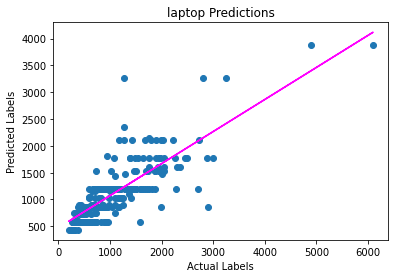

In [ ]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model5 = GradientBoostingRegressor().fit(X_train, y_train)
print (model5, "\n")

# Evaluate the model using the test data
predictions5 = model.predict(X_test)
mse5 = mean_squared_error(y_test, predictions5)
print("MSE:", mse5)
rmse5 = np.sqrt(mse5)
print("RMSE:", rmse5)
r2_5 = r2_score(y_test, predictions5)
print("R2:", r2_5)

# Plot predicted vs actual
plt.scatter(y_test, predictions5)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('laptop Predictions')
# overlay the regression line
z5 = np.polyfit(y_test, predictions5, 1)
p5 = np.poly1d(z)
plt.plot(y_test,p5(y_test), color='magenta')
plt.show()

In [ ]:
Kreg = KNeighborsRegressor()
Kreg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
pred = Kreg.predict(X_train)
k_mse = mean_squared_error(y_train, pred)
k_rmse = np.sqrt(k_mse)
k_rmse

454.60455685577386

In [ ]:
param_grid = {'n_neighbors': np.arange(1, 12, 2),
              'weights': ['uniform', 'distance']}
grid_search = GridSearchCV(Kreg, param_grid)
grid_search.fit(X_train, y_train)
print("Best score: " + str(grid_search.best_score_))

Best score: 0.611453653624873


In [ ]:
final_model = grid_search.best_estimator_
final_pred = final_model.predict(X_test)
final_pred = final_pred.tolist()
for pred in range(0, len(final_pred)):
    print("Predicition: " + str(round(final_pred[pred], 2)) + " Actual: " + str(y_test[pred]))

Predicition: 1042.43 Actual: 1672.0
Predicition: 1042.43 Actual: 1149.0
Predicition: 591.28 Actual: 499.0
Predicition: 778.81 Actual: 899.0
Predicition: 708.74 Actual: 1244.0
Predicition: 1042.43 Actual: 1398.99
Predicition: 649.14 Actual: 719.0
Predicition: 778.81 Actual: 459.0
Predicition: 1199.69 Actual: 1191.0
Predicition: 739.28 Actual: 349.0
Predicition: 1683.43 Actual: 1899.0
Predicition: 778.81 Actual: 726.0
Predicition: 1042.43 Actual: 1813.0
Predicition: 778.81 Actual: 805.99
Predicition: 1986.91 Actual: 1949.0
Predicition: 1042.43 Actual: 899.0
Predicition: 1042.43 Actual: 1145.0
Predicition: 778.81 Actual: 961.0
Predicition: 1194.71 Actual: 713.07
Predicition: 1986.91 Actual: 1649.0
Predicition: 1771.43 Actual: 2349.0
Predicition: 739.28 Actual: 720.32
Predicition: 1042.43 Actual: 798.01
Predicition: 739.28 Actual: 265.0
Predicition: 1042.43 Actual: 1149.0
Predicition: 1194.71 Actual: 999.0
Predicition: 739.28 Actual: 959.0
Predicition: 739.28 Actual: 825.0
Predicition: 104

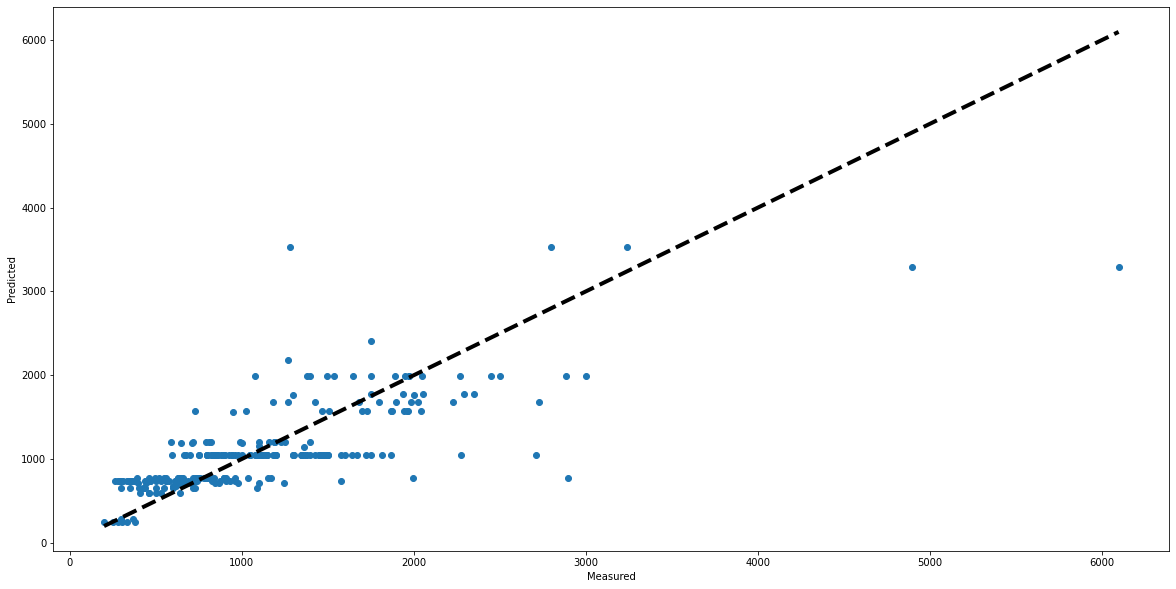

In [ ]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax.scatter(y_test, final_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()